# Chapter 1.2 - Optimization

** Contributors: Jerel B. Nielsen, Randal W. Beard **

### Table of Contents

1. [Motivating Example](#Motivating-Example)
1. [Gauss-Newton Iteration](#Gauss-Newton-Iteration)
1. [Levenberg-Marquardt Iteration](#Levenberg-Marquardt-Iteration)

## Motivating Example

This section closely follows [Minimization on the Lie Group SO(3) and Related Manifolds](http://www.seas.upenn.edu/~cjtaylor/PUBLICATIONS/pdfs/TaylorTR94b.pdf) by Taylor and Kriegman

Suppose that a 2D camera is rotated in place by an angle of $\theta$ and collects a set of corresponding points at both orientations.  Let $\{\mathbf{p}_i^0\}_{i=1}^N$ and $\{\mathbf{p}_i^1\}_{i=1}^N$ be the corresponding points in frame $0$ and frame $1$, as shown in the figure below for a single point.

<img src="files/rotation_optimization.png" width="300">

Let $R\in SO(2)$ be the rotation matrix from frame $0$ to frame $1$.  Then, we should have that $\mathbf{p}^1 = R\mathbf{p}^0$.  Since the inner product $<x, y> = y^\top x$ is maximized when $x=y$, we have that $<R\mathbf{p}^0, \mathbf{p}^1> = (\mathbf{p}^1)^\top R \mathbf{p}^0$ is maximized over all $R$ when $R$ is the correct rotation matrix. 

If the corresponding image points have noise, then the objective may be to solve the following optimization problem:
\begin{equation} \label{eq:opt_S1}
R^\ast = \arg\max_R \sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R \mathbf{p}_i^0 \right]^2.
\end{equation}

Equation \eqref{eq:opt_S1} is an example of an optimization problem over $SO(2)$.

## Gauss-Newton Iteration

We will show how to construct a Gauss-Newton iteration algorithm to solve this optimization problem.  The basic idea is to parameterize the rotation matrix $R\in SO(2)$ at the $k^{th}$ iteration as 
\begin{equation}
R_k = R_{k-1} e^{J\omega_k}.
\end{equation}
The cost function can then be written as 
\begin{align}
V(\omega_k) &= \sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]^2 \\
    &\approx V(0) + \left(\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0}\right)^\top \omega_k + \omega_k^\top \left(\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0}\right)\omega_k.
    \label{eq:cost_quadratic_approx}
\end{align}
The Guauss-Newton step that maximizes \eqref{eq:cost_quadratic_approx} is therefore
$$
\omega_k = \frac{\gamma}{2} \left(\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0}\right)^{-1}\left(\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0}\right),
$$
where
\begin{align*}
\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0} &= 
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]^2 \right] \\
&= 2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right] \\
&= 2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J \mathbf{p}_i^0 \right]
\end{align*}
since
\begin{align*}
\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} &=
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[I + J\omega_k + \frac{1}{2!}J^2\omega_k^2 + \cdots \right] \\
&= \left[J + J^2\omega_k + \frac{1}{2!}J^3\omega_k^2\right]_{\omega_k=0} \\
&= Je^{J\omega_k}\Big|_{\omega_k=1} = J
\end{align*}
and
\begin{align*}
\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0} &= 
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}Je^{J\omega_k} \mathbf{p}_i^0 \right] \right]\\
&= 
2\sum_{i=1}^N \left\{ \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right] + \left[ (\mathbf{p}_i^1)^\top R_{k-1}\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}Je^{J\omega_k} \mathbf{p}_i^0 \right] \right\} \\
&= 
2\sum_{i=1}^N \left\{ \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J^2 \mathbf{p}_i^0 \right] + \left[ (\mathbf{p}_i^1)^\top R_{k-1}J \mathbf{p}_i^0 \right]^2\right\}.
\end{align*}


## Levenberg-Marquardt Iteration

Suppose we have ground robot equipped with some kind of sensor like
a LIDAR or Intel RealSense camera that can measure direction and distance
measurements to landmarks as shown in the following figure. Using
these measurements, we can estimate the unknown rotation and translation
by optimization between measurements. The $i^{th}$ landmark vector
measured in frame $b$ is defined in terms of the frame $a$ measurement
by

\begin{equation}
{\bf l}_{i}^{b}=R_{a}^{b}{\bf l}_{i}^{a}+{\bf t}^{b},
\end{equation}
where ${\bf t}^{b}$ is the robot translation from frame $a$ to frame
$b$ in frame $b$ and $R_{a}^{b}$ is the passive rotation from frame
$a$ to frame $b$. Likewise, the $i^{th}$ landmark measurement in
frame $a$ may given in terms of the frame $b$ measurement by

\begin{equation}
{\bf l}_{i}^{a}=\left(R_{a}^{b}\right)^{\top}\left({\bf l}_{i}^{b}-{\bf t}^{b}\right).
\end{equation}

The residual error due to rotation and translation of the $i^{th}$
landmark may be given by moving everything to one side of either of
the previous two equations and pre-multiplying by itself to get a
scalar. There could be a nice way to combine these two error equations
because the error may differ between them, but we'll just pick one
for now. We will use the first because its derivatives are slightly
more simple, which gives the residual error

\begin{equation}
r_{i}=\frac{1}{2}{\bf e}^{\top}{\bf e},
\end{equation}
where

\begin{equation}
{\bf e}={\bf l}_{i}^{b}-R_{a}^{b}{\bf l}_{i}^{a}-{\bf t}^{b}.
\end{equation}

Since each landmark measurement is noisy, we can treat this as a nonlinear
least squares problem and solve for the rotation and translation that
gives us the lowest square error over all of the landmark measurements
with the Gauss-Newton algorithm. To do this, we need the Jacobian
of the residual error with respect to each variable. The derivative
of the residual error w.r.t. translation is straightforward and is
given by

\begin{equation}
\frac{\partial r_{i}}{\partial{\bf t}^{b}}={\bf e}^{\top}\frac{\partial{\bf e}}{\partial{\bf t}^{b}},
\end{equation}
where

\begin{equation}
\frac{\partial{\bf e}}{\partial{\bf t}^{b}}=-I.
\end{equation}
We can find the derivatives with respect to change in rotation on
the manifold by taking limits. Elements of $SO\left(2\right)$ are
not vectors, so we cannot directly perform addition with them. Let's
define a new type of addition operator by 

\begin{align}
\boxplus & :SO\left(2\right)\times\mathbb{R}^{1}\rightarrow SO\left(2\right),\\
R\boxplus\delta & =\exp\left(\delta^{\times}\right)R,
\end{align}
where

\begin{equation}
\delta^{\times}=\begin{bmatrix}0 & -\delta\\
\delta & 0
\end{bmatrix}.
\end{equation}

The derivative w.r.t. rotation of the error is then given by

\begin{equation}
\frac{\partial r_{i}}{\partial R}={\bf e}^{\top}\frac{\partial{\bf e}}{\partial R},
\end{equation}
where

\begin{align}
\frac{\partial{\bf e}}{\partial R} & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[\left({\bf l}_{i}^{b}-\left(R_{a}^{b}\boxplus\epsilon\right){\bf l}_{i}^{a}+{\bf t}^{b}\right)-\left({\bf l}_{i}^{b}-R_{a}^{b}{\bf l}_{i}^{a}+{\bf t}^{b}\right)\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(\exp\left({\bf 1}^{\times}\epsilon\right)R_{a}^{b}\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(\left(I+{\bf 1}^{\times}\epsilon\right)R_{a}^{b}\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(R_{a}^{b}+{\bf 1}^{\times}R_{a}^{b}\epsilon\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-R_{a}^{b}{\bf l}_{i}^{a}-{\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}\epsilon+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-{\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}\epsilon\right]\\
 & =-{\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}.
\end{align}

The Gauss-Newton algorithm is explained well on its [wikipedia page](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm) . Gauss-Newton can give us an update vector for $N$ landmark measurement
matches between frames by

\begin{equation}
\boldsymbol{\delta}=-\left(J^{\top}J\right)^{-1}J^{\top}{\bf r},
\end{equation}
where

\begin{align}
J & =\begin{bmatrix}\frac{\partial r_{1}}{\partial R} & \frac{\partial r_{1}}{\partial t_{x}} & \frac{\partial r_{1}}{\partial t_{y}}\\
\vdots & \vdots & \vdots\\
\frac{\partial r_{N}}{\partial R} & \frac{\partial r_{N}}{\partial t_{x}} & \frac{\partial r_{N}}{\partial t_{y}}
\end{bmatrix}\\
{\bf r} & =\begin{bmatrix}r_{1} & \cdots & r_{N}\end{bmatrix}^{\top}.
\end{align}
The rotation estimate is updated with the first element of $\boldsymbol{\delta}$
and translation with the second two elements by

\begin{align}
R_{n+1} & =R_{n}\boxplus\delta_{1}\\
{\bf t}_{n+1} & ={\bf t}_{n}+\begin{bmatrix}\delta_{2}\\
\delta_{3}
\end{bmatrix}.
\end{align}

Levenberg-Marquardt optimization is a mix of Gauss-Newton and Gradient Descent because it introduces a scaling factor to adjust the step size during optimization. This prevents the optimization from getting hung up or stuck in oscillation patterns, which occurs in our Gauss-Newton optimization below. Refer to the [Levenberg-Marquardt](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) wikipedia page for more details.


Number of Gauss-Newton iterations:        99
Number of Levenberg-Marquardt iterations: 28

Gauss-Newton rotation error:        0.007392
Levenberg-Marquardt rotation error: 0.002217

Gauss-Newton translation error:        0.036349
Levenberg-Marquardt translation error: 0.025593


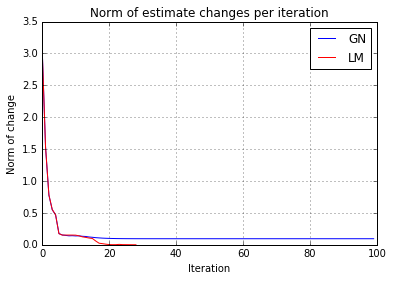

In [1]:
# Comparison of Gauss-Newton and Levenberg-Marquardt on SO(2)
from numpy import array, vstack, sin, cos, eye, zeros, arccos
from numpy.linalg import pinv, norm
from numpy.random import randn, seed
%matplotlib inline
import matplotlib.pyplot as plt

# use fixed random seed for to compare results against same values
seed(0)

def skew(a):
    return array([[0,-a],[a,0]])

def R(theta):
    return array([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])

def expSO2(delta):
    return array([[cos(delta),-sin(delta)],[sin(delta),cos(delta)]])

def err(R,t,la,lb):
    return lb - R.dot(la) - t

def rerr(e):
    return 0.5*e.transpose().dot(e)

# Gauss-Newton algorithm
def GN(R0,t0,la,lb):
    Rhat = R0.copy()
    that = t0.copy()
    onex = skew(1.)
    delta_hist = []
    for i in range(100):
        rlist = []
        J = zeros([N,3])
        for j in range(la.shape[1]):
            # residual
            e = err(Rhat,that,la[:,j:j+1],lb[:,j:j+1])
            rlist += [rerr(e)]

            # jacobian
            J[j,0] = -e.transpose().dot(onex.dot(Rhat).dot(la[:,j:j+1]))
            J[j,1:] = -e.transpose()
        r = vstack(rlist)

        # update estimates
        delta = -pinv(J).dot(r)
        Rhat = expSO2(delta[0,0]).dot(Rhat)
        that += delta[1:,0:1]

        # stop iterations when change is small
        delta_mag = norm(delta)
        delta_hist += [delta_mag]
        if delta_mag < 1e-3: break
    return i,Rhat,that,delta_hist

# Levenberg-Marquardt algorithm
def LM(R0,t0,la,lb):
    Rhat = R0.copy()
    that = t0.copy()
    onex = skew(1.)
    delta_hist = []
    lam = 0.1
    new_J = True
    r2 = 0.
    J = zeros([N,3])
    H = zeros([3,3])
    for i in range(100):
        if new_J:
            rlist = []
            for j in range(N):
                # residual
                e = err(Rhat,that,la[:,j:j+1],lb[:,j:j+1])
                rlist += [rerr(e)]

                # jacobian
                J[j,0] = -e.transpose().dot(onex.dot(Rhat).dot(la[:,j:j+1]))
                J[j,1:] = -e.transpose()
            r = vstack(rlist)
            H = J.transpose().dot(J)
            if i == 0:
                r2 = r.transpose().dot(r)[0,0]

        # dampen the Hessian
        H_damped = H + lam*eye(3)

        # update estimates
        delta = -pinv(H_damped).dot(J.transpose()).dot(r)
        Rnew = expSO2(delta[0,0]).dot(Rhat)
        tnew = that + delta[1:,0:1]

        # check squared error with new transform
        rlist = []
        for j in range(N):
            e = err(Rnew, tnew, la[:, j:j + 1], lb[:, j:j + 1])
            rlist += [rerr(e)]
        rnew = vstack(rlist)
        r2_new = rnew.transpose().dot(rnew)[0,0]

        # check new error against the old
        if r2_new < r2:
            lam /= 10.
            Rhat = Rnew.copy()
            that = tnew.copy()
            r2 = r2_new.copy()
            new_J = True
        else:
            lam *= 10.
            new_J = False

        # stop iterations when change is small
        delta_mag = norm(delta)
        delta_hist += [delta_mag]
        if delta_mag < 1e-3: break
    return i,Rhat,that,delta_hist

# landmarks, camera positions, camera attitudes
N = 100
lm = 2*randn(2,N)
pa = vstack([-10.,-3.])
pb = vstack([-9.,3.])
Ra = R(0.2)
Rb = R(-0.2)

# true camera rotation and translation
Rab = R(-0.4)
tab = Rb.dot(pa - pb)

# measurements from each camera
noise_stdev = 0.1
noise_a = noise_stdev*randn(2,N)
noise_b = noise_stdev*randn(2,N)
la = Ra.dot(lm - pa) + noise_a
lb = Rb.dot(lm - pb) + noise_b

# initial guesses
R0 = eye(2)
t0 = vstack([0.,0.])

# Gauss-Newton
gn_iters,R_gn,t_gn,gn_hist = GN(R0,t0,la,lb)
lm_iters,R_lm,t_lm,lm_hist = LM(R0,t0,la,lb)

# check error in rotations
vec = vstack([1,0])
vt = Rab.dot(vec)
vgn = R_gn.dot(vec)
vlm = R_lm.dot(vec)

print("\nNumber of Gauss-Newton iterations:        %d" % gn_iters)
print("Number of Levenberg-Marquardt iterations: %d" % lm_iters)

print("\nGauss-Newton rotation error:        %f" % arccos(vt.transpose().dot(vgn)))
print("Levenberg-Marquardt rotation error: %f" % arccos(vt.transpose().dot(vlm)))

print("\nGauss-Newton translation error:        %f" % norm(tab-t_gn))
print("Levenberg-Marquardt translation error: %f" % norm(tab-t_lm))

# plot norm of delta at each iteration
fig = plt.figure()
plt.plot(gn_hist,'b',label="GN")
plt.plot(lm_hist,'r',label="LM")
plt.title('Norm of estimate changes per iteration')
plt.grid(); plt.xlabel('Iteration'); plt.ylabel('Norm of change')
plt.legend()
plt.show()